In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import matplotlib.pyplot as plt

base_dir = '/content/gdrive/MyDrive/FacialAgingProject/DATASET/'
classes = ['dark spots', 'puffy eyes', 'wrinkles', 'clear skin']
class_counts = {}

for class_name in classes:
    class_path = os.path.join(base_dir, class_name)
    count = len(os.listdir(class_path))
    class_counts[class_name] = count
    print(f"Class '{class_name}': {count} images")

Class 'dark spots': 300 images
Class 'puffy eyes': 300 images
Class 'wrinkles': 300 images
Class 'clear skin': 300 images


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from google.colab import drive

In [ ]:
data_dir = '/content/gdrive/MyDrive/FacialAgingProject/DATASET/'
classes = ['wrinkles', 'dark spots', 'puffy eyes', 'clear skin']
IMG_SIZE = 224
RANDOM_STATE = 42

In [ ]:
def load_images(data_dir, classes):
    """Loads images, resizes, and converts BGR to RGB."""
    data = []
    labels = []

    print("Starting image loading and resizing...")
    for idx, label in enumerate(classes):
        path = os.path.join(data_dir, label)
        if not os.path.exists(path):
            print(f"ERROR: Path not found: {path}")
            continue

        print(f"Processing class: {label}")
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path)

            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

                data.append(img.astype('float32'))
                labels.append(idx)
            else: print(f"Warning: Could not read image {img_name}")

    return np.array(data), np.array(labels)


In [ ]:
X, y = load_images(data_dir, classes)
X, y = shuffle(X, y, random_state=RANDOM_STATE)

y_encoded = to_categorical(y, num_classes=len(classes))

print(f"Images (X) shape: {X.shape} (Range [0, 255])")
print(f"Labels (y_encoded) shape: {y_encoded.shape} (One-Hot Encoded)")

Starting image loading and resizing...
Processing class: wrinkles
Processing class: dark spots
Processing class: puffy eyes
Processing class: clear skin
Images (X) shape: (1200, 224, 224, 3) (Range [0, 255])
Labels (y_encoded) shape: (1200, 4) (One-Hot Encoded)



 Augmentation
Displaying 5 augmented versions of a sample image:


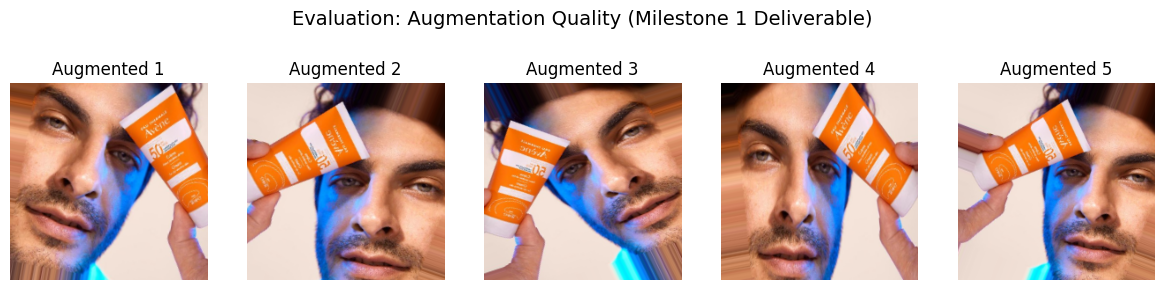

In [ ]:
print("\n Augmentation")
datagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

sample_img = X[0].reshape((1,) + X[0].shape)
i = 0
plt.figure(figsize=(12, 3))
print("Displaying 5 augmented versions of a sample image:")

for batch in datagen.flow(sample_img, batch_size=1):
    plt.subplot(1, 5, i + 1)
    plt.imshow(batch[0] / 255.0)
    plt.title(f"Augmented {i+1}")
    plt.axis('off')
    i += 1
    if i >= 5:
        break

plt.suptitle("Evaluation: Augmentation Quality (Milestone 1 Deliverable)", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.savefig('/content/gdrive/MyDrive/FacialAgingProject/augmentation_visualization.png')
plt.show()

In [ ]:
output_dir = '/content/gdrive/MyDrive/FacialAgingProject/'
np.save(os.path.join(output_dir, 'X_data_224_rgb.npy'), X)
np.save(os.path.join(output_dir, 'y_labels_one_hot.npy'), y_encoded)

print(f"Final preprocessed data saved to: {output_dir}")

Final preprocessed data saved to: /content/gdrive/MyDrive/FacialAgingProject/


Mounting Google Drive...
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Output directory set to: /content/gdrive/MyDrive/FacialAgingProject/
Starting image loading and resizing...
Processing class: wrinkles
Processing class: dark spots
Processing class: puffy eyes
Processing class: clear skin

Images (X) shape: (1200, 224, 224, 3) (Range [0, 255])
Labels (y_encoded) shape: (1200, 4) (One-Hot Encoded)
Data saved to: /content/gdrive/MyDrive/FacialAgingProject/X_data_224_rgb.npy
Labels saved to: /content/gdrive/MyDrive/FacialAgingProject/y_labels_one_hot.npy


/tmp/ipython-input-32171410.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.countplot(x=label_names, palette="viridis")


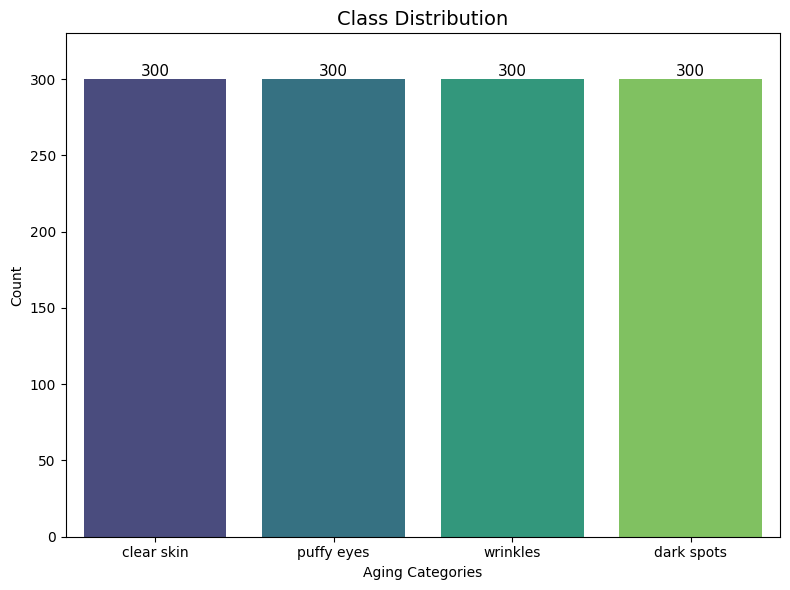


--- Preprocessing Complete ---


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from google.colab import drive

# --- Configuration ---
DRIVE_PATH = '/content/gdrive'
BASE_DIR = os.path.join(DRIVE_PATH, 'MyDrive/FacialAgingProject/DATASET/')
OUTPUT_DIR = os.path.join(DRIVE_PATH, 'MyDrive/FacialAgingProject/')
CLASSES = ['wrinkles', 'dark spots', 'puffy eyes', 'clear skin']
IMG_SIZE = 224
RANDOM_STATE = 42

# --- Mount Drive ---
print("Mounting Google Drive...")
drive.mount(DRIVE_PATH)

# Ensure output directory exists
os.makedirs(OUTPUT_DIR, exist_ok=True)
print(f"Output directory set to: {OUTPUT_DIR}")

def load_images(data_dir, classes):
    """Loads images, resizes, and converts BGR to RGB."""
    data = []
    labels = []
    label_names_for_plot = []

    print("Starting image loading and resizing...")
    for idx, label in enumerate(classes):
        path = os.path.join(data_dir, label)
        if not os.path.exists(path):
            print(f"ERROR: Path not found: {path}")
            continue

        print(f"Processing class: {label}")
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path)

            if img is not None:
                # Convert BGR (OpenCV default) to RGB (Matplotlib/TF default)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

                # Append as float32 in [0, 255] range
                # The EfficientNet preprocessing layer will handle scaling
                data.append(img.astype('float32'))
                labels.append(idx)
                label_names_for_plot.append(label)
            else:
                print(f"Warning: Could not read image {img_name}")

    return np.array(data), np.array(labels), label_names_for_plot

# --- Load, Process, and Save Data ---
X, y, label_names = load_images(BASE_DIR, CLASSES)

# Shuffle the data
X, y, label_names = shuffle(X, y, label_names, random_state=RANDOM_STATE)

# One-hot encode the labels
y_encoded = to_categorical(y, num_classes=len(CLASSES))

print(f"\nImages (X) shape: {X.shape} (Range [0, 255])")
print(f"Labels (y_encoded) shape: {y_encoded.shape} (One-Hot Encoded)")

# --- Save .npy files ---
X_data_path = os.path.join(OUTPUT_DIR, 'X_data_224_rgb.npy')
y_labels_path = os.path.join(OUTPUT_DIR, 'y_labels_one_hot.npy')

np.save(X_data_path, X)
np.save(y_labels_path, y_encoded)

print(f"Data saved to: {X_data_path}")
print(f"Labels saved to: {y_labels_path}")

# --- Visualize Class Distribution (from your original code) ---
plt.figure(figsize=(8, 6))
bars = sns.countplot(x=label_names, palette="viridis")
plt.title("Class Distribution", fontsize=14)
plt.xlabel("Aging Categories")
plt.ylabel("Count")
plt.ylim(0, max(np.bincount(y)) * 1.1) # Set ylim dynamically

for bar in bars.patches:
    bars.annotate(f'{int(bar.get_height())}',
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='bottom', fontsize=11, color='black')

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'class_distribution_plot.png'))
plt.show()

print("\n--- Preprocessing Complete ---")

Mounting Google Drive...
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Loading preprocessed dataset...
Data loaded. X shape: (1200, 224, 224, 3), y shape: (1200, 4)
Dataset Split | Train: (960, 224, 224, 3), Val: (240, 224, 224, 3)
Class Weights: {0: np.float64(1.0), 1: np.float64(1.0), 2: np.float64(1.0), 3: np.float64(1.0)}
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,378,535 (16.70 MB)

 Trainable params: 328,964 (1.25 MB)

 Non-trainable params: 4,049,571 (15.45 MB)


--- Stage 1: Training classification head ---


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40

Epoch 1: val_accuracy improved from -inf to 0.75417, saving model to /content/gdrive/MyDrive/FacialAgingProject/stage1_best.h5


60/60 - 60s - 1000ms/step - accuracy: 0.6635 - loss: 0.8533 - val_accuracy: 0.7542 - val_loss: 0.6884
Epoch 2/40

Epoch 2: val_accuracy improved from 0.75417 to 0.80000, saving model to /content/gdrive/MyDrive/FacialAgingProject/stage1_best.h5


60/60 - 50s - 831ms/step - accuracy: 0.7917 - loss: 0.5998 - val_accuracy: 0.8000 - val_loss: 0.5801
Epoch 3/40

Epoch 3: val_accuracy improved from 0.80000 to 0.82083, saving model to /content/gdrive/MyDrive/FacialAgingProject/stage1_best.h5


60/60 - 88s - 1s/step - accuracy: 0.8198 - loss: 0.5103 - val_accuracy: 0.8208 - val_loss: 0.5406
Epoch 4/40

Epoch 4: val_accuracy improved from 0.82083 to 0.83750, saving model to /content/gdrive/MyDrive/FacialAgingProject/stage1_best.h5


60/60 - 56s - 928ms/step - accuracy: 0.8500 - loss: 0.4692 - val_accuracy: 0.8375 - val_loss: 0.5102
Epoch 5/40

Epoch 5: val_accuracy did not improve from 0.83750
60/60 - 49s - 813ms/step - accuracy: 0.8656 - loss: 0.4372 - val_accuracy: 0.8167 - val_loss: 0.4958
Epoch 6/40

Epoch 6: val_accuracy improved from 0.83750 to 0.84583, saving model to /content/gdrive/MyDrive/FacialAgingProject/stage1_best.h5


60/60 - 83s - 1s/step - accuracy: 0.8594 - loss: 0.4223 - val_accuracy: 0.8458 - val_loss: 0.4700
Epoch 7/40

Epoch 7: val_accuracy did not improve from 0.84583
60/60 - 50s - 835ms/step - accuracy: 0.8604 - loss: 0.4001 - val_accuracy: 0.8083 - val_loss: 0.5217
Epoch 8/40

Epoch 8: val_accuracy did not improve from 0.84583
60/60 - 82s - 1s/step - accuracy: 0.8729 - loss: 0.3957 - val_accuracy: 0.8375 - val_loss: 0.4884
Epoch 9/40

Epoch 9: val_accuracy did not improve from 0.84583
60/60 - 56s - 930ms/step - accuracy: 0.8646 - loss: 0.3950 - val_accuracy: 0.8167 - val_loss: 0.5169
Epoch 10/40

Epoch 10: val_accuracy did not improve from 0.84583
60/60 - 52s - 861ms/step - accuracy: 0.8958 - loss: 0.3529 - val_accuracy: 0.8375 - val_loss: 0.4762
Epoch 11/40

Epoch 11: val_accuracy did not improve from 0.84583
60/60 - 51s - 856ms/step - accuracy: 0.8771 - loss: 0.3498 - val_accuracy: 0.8292 - val_loss: 0.4838
Epoch 12/40

Epoch 12: val_accuracy did not improve from 0.84583
60/60 - 51s - 84

60/60 - 73s - 1s/step - accuracy: 0.7510 - loss: 0.7724 - val_accuracy: 0.8542 - val_loss: 0.5079 - learning_rate: 1.0000e-05
Epoch 13/80

Epoch 13: val_accuracy did not improve from 0.85417
60/60 - 58s - 966ms/step - accuracy: 0.7448 - loss: 0.6894 - val_accuracy: 0.8292 - val_loss: 0.5373 - learning_rate: 1.0000e-05
Epoch 14/80

Epoch 14: val_accuracy did not improve from 0.85417
60/60 - 81s - 1s/step - accuracy: 0.7542 - loss: 0.6828 - val_accuracy: 0.8167 - val_loss: 0.5506 - learning_rate: 1.0000e-05
Epoch 15/80

Epoch 15: val_accuracy did not improve from 0.85417

Epoch 15: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
60/60 - 82s - 1s/step - accuracy: 0.7729 - loss: 0.6412 - val_accuracy: 0.8375 - val_loss: 0.5533 - learning_rate: 1.0000e-05
Epoch 16/80

Epoch 16: val_accuracy did not improve from 0.85417
60/60 - 57s - 946ms/step - accuracy: 0.7833 - loss: 0.5804 - val_accuracy: 0.8292 - val_loss: 0.5538 - learning_rate: 5.0000e-06
Epoch 17/80

Epoch 17: val

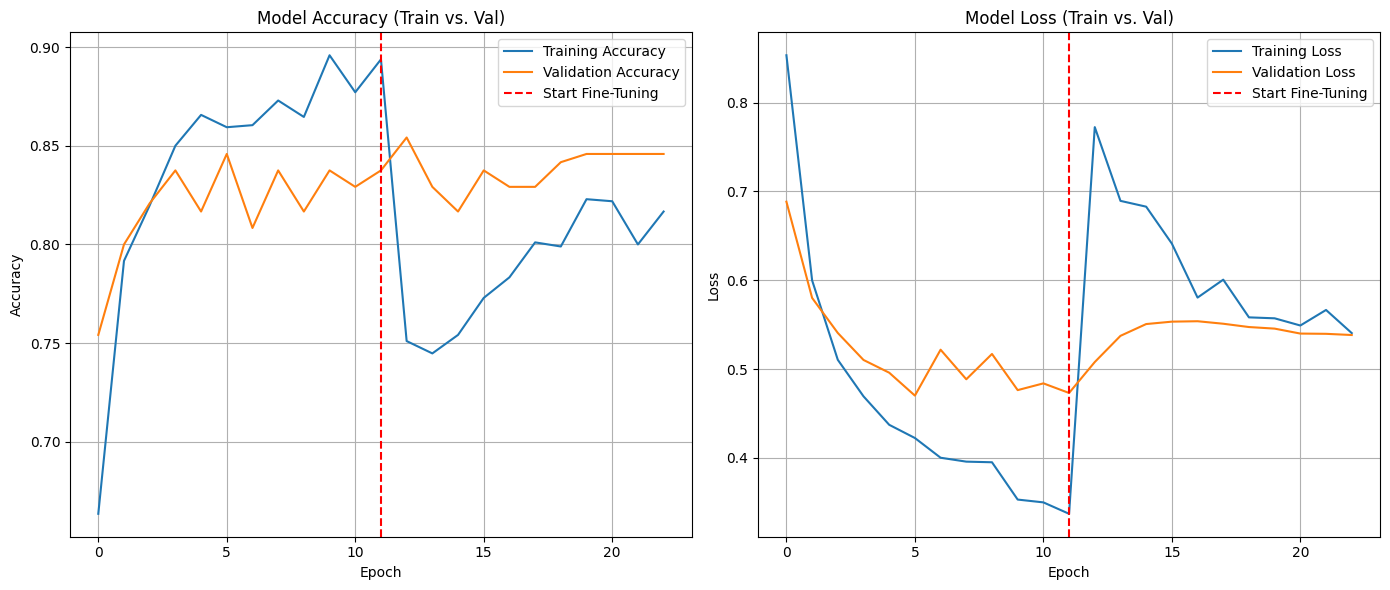

Loading best fine-tuned model for final evaluation...

Generating classification report and confusion matrix...
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step
Classification Report:
              precision    recall  f1-score   support

    wrinkles       0.79      0.82      0.80        60
  dark spots       0.95      0.88      0.91        60
  puffy eyes       0.83      0.73      0.78        60
  clear skin       0.86      0.98      0.91        60

    accuracy                           0.85       240
   macro avg       0.86      0.85      0.85       240
weighted avg       0.86      0.85      0.85       240



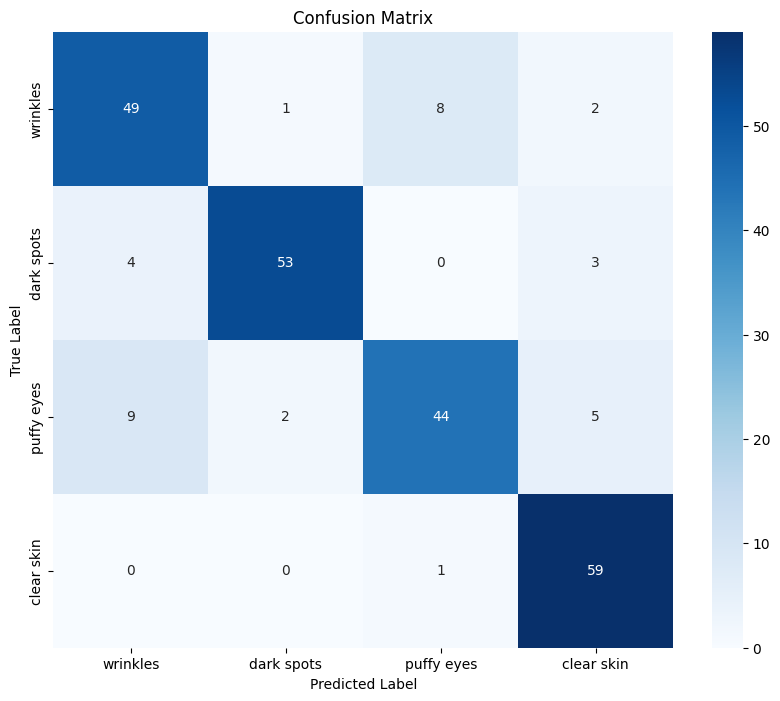


--- Model Training and Evaluation Complete ---


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix

# --- Configuration ---
DRIVE_PATH = '/content/gdrive'
DATA_PATH = os.path.join(DRIVE_PATH, 'MyDrive/FacialAgingProject/')
MODEL_PATH = os.path.join(DATA_PATH, 'final_efficientnet_model.h5')
CLASSES = ['wrinkles', 'dark spots', 'puffy eyes', 'clear skin']
NUM_CLASSES = len(CLASSES)
IMG_SIZE = 224
RANDOM_STATE = 42

# --- Hyperparameters ---
INITIAL_LR = 1e-3
FINE_TUNE_LR = 1e-5
BATCH_SIZE = 16
EPOCHS_STAGE1 = 40  # Initial training
EPOCHS_STAGE2 = 40  # Fine-tuning (can be increased)

# --- Mount Drive ---
print("Mounting Google Drive...")
drive.mount(DRIVE_PATH)

# --- Load Preprocessed Data ---
print("Loading preprocessed dataset...")
try:
    X = np.load(os.path.join(DATA_PATH, 'X_data_224_rgb.npy'))
    y_encoded = np.load(os.path.join(DATA_PATH, 'y_labels_one_hot.npy'))
except FileNotFoundError:
    raise FileNotFoundError("Data files not found. Run the PREPROCESSING script first.")

# CRITICAL: Ensure data is float32, but KEEP [0, 255] range
X = X.astype('float32')
print(f"Data loaded. X shape: {X.shape}, y shape: {y_encoded.shape}")

# --- Split Data ---
X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded, test_size=0.2, random_state=RANDOM_STATE, stratify=y_encoded
)
print(f"Dataset Split | Train: {X_train.shape}, Val: {X_val.shape}")

# --- Class Weights ---
y_train_labels = np.argmax(y_train, axis=1)
class_weights_val = compute_class_weight(
    'balanced', classes=np.arange(NUM_CLASSES), y=y_train_labels
)
class_weights = dict(enumerate(class_weights_val))
print(f"Class Weights: {class_weights}")

# --- Data Augmentation Generators ---
# 1. Training Generator (with augmentation)
datagen_train = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = datagen_train.flow(X_train, y_train, batch_size=BATCH_SIZE)

# 2. Validation Generator (NO augmentation)
datagen_val = ImageDataGenerator() # No augmentations
val_generator = datagen_val.flow(X_val, y_val, batch_size=BATCH_SIZE, shuffle=False)

# --- Build Model ---
def build_model(input_shape=(224, 224, 3), num_classes=4):
    """Builds the EfficientNetB0 model with an input preprocessing layer."""
    preprocess_input = tf.keras.applications.efficientnet.preprocess_input

    inputs = Input(shape=input_shape)

    # This layer handles the [0, 255] -> [-1, 1] scaling
    x = preprocess_input(inputs)

    base_model = EfficientNetB0(include_top=False, weights='imagenet', input_tensor=x)
    base_model.trainable = False  # Freeze base model

    x = GlobalAveragePooling2D()(base_model.output)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu', kernel_regularizer=l2(1e-4))(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model, base_model

model, base_model = build_model()
model.summary()

# --- Stage 1: Training Classification Head ---
print("\n--- Stage 1: Training classification head ---")
model.compile(
    optimizer=Adam(learning_rate=INITIAL_LR),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

callbacks_stage1 = [
    EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True),
    ModelCheckpoint(
        os.path.join(DATA_PATH, 'stage1_best.h5'),
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

steps_per_epoch = len(X_train) // BATCH_SIZE
validation_steps = len(X_val) // BATCH_SIZE

history_stage1 = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    validation_steps=validation_steps,
    epochs=EPOCHS_STAGE1,
    class_weight=class_weights,
    callbacks=callbacks_stage1,
    verbose=2
)

# --- Stage 2: Fine-Tuning ---
print("\n--- Stage 2: Fine-tuning EfficientNet layers ---")
model.load_weights(os.path.join(DATA_PATH, 'stage1_best.h5'))
base_model.trainable = True

# Unfreeze the top 30 layers.
FINE_TUNE_AT = -30
for layer in base_model.layers[:FINE_TUNE_AT]:
    layer.trainable = False
print(f"Fine-tuning: Unfreezing the top {abs(FINE_TUNE_AT)} layers.")

model.compile(
    optimizer=Adam(learning_rate=FINE_TUNE_LR),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

callbacks_stage2 = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint(MODEL_PATH, monitor='val_accuracy', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-7)
]

total_epochs = EPOCHS_STAGE1 + EPOCHS_STAGE2

history_stage2 = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    validation_steps=validation_steps,
    epochs=total_epochs,
    initial_epoch=history_stage1.epoch[-1],
    class_weight=class_weights,
    callbacks=callbacks_stage2,
    verbose=2
)

print(f"\nTraining Complete. Final model saved to: {MODEL_PATH}")

# ==========================================================
# 📊 PLOTTING AND EVALUATION
# ==========================================================

# --- 1. Plot Training & Validation Curves ---
def plot_history(history1, history2):
    """Combines and plots the history from two training stages."""
    acc = history1.history['accuracy'] + history2.history['accuracy']
    val_acc = history1.history['val_accuracy'] + history2.history['val_accuracy']
    loss = history1.history['loss'] + history2.history['loss']
    val_loss = history1.history['val_loss'] + history2.history['val_loss']

    epochs_stage1 = len(history1.history['accuracy'])

    plt.figure(figsize=(14, 6))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.axvline(epochs_stage1 - 1, color='red', linestyle='--', label='Start Fine-Tuning')
    plt.title('Model Accuracy (Train vs. Val)')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.axvline(epochs_stage1 - 1, color='red', linestyle='--', label='Start Fine-Tuning')
    plt.title('Model Loss (Train vs. Val)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(os.path.join(DATA_PATH, 'training_curves.png'))
    plt.show()

print("\nGenerating training history plots...")
plot_history(history_stage1, history_stage2)

# --- 2. Confusion Matrix and Classification Report ---
def plot_confusion_matrix(model, x_val, y_val_one_hot, class_names):
    """Plots the confusion matrix and prints a classification report."""
    print("\nGenerating classification report and confusion matrix...")

    # Predict on the validation set
    # We predict on X_val directly since the model has preprocessing built-in
    y_pred = model.predict(x_val)

    # Convert from one-hot to class index
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_val_one_hot, axis=1)

    # Print Classification Report
    print("Classification Report:")
    print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

    # Compute Confusion Matrix
    cm = confusion_matrix(y_true_classes, y_pred_classes)

    # Plot Confusion Matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.savefig(os.path.join(DATA_PATH, 'confusion_matrix.png'))
    plt.show()

# Load the best *final* model to be sure
print("Loading best fine-tuned model for final evaluation...")
model.load_weights(MODEL_PATH)
plot_confusion_matrix(model, X_val, y_val, CLASSES)

print("\n--- Model Training and Evaluation Complete ---")

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mounting Google Drive...
Drive already mounted.

Starting image loading from: /content/gdrive/MyDrive/FacialAgingProject/unseen_test
Processing class: wrinkles
Processing class: dark spots
Processing class: puffy eyes
Processing class: clear skin

Unseen Dataset Loaded. Total images: **199**
Data shape: (199, 224, 224, 3)

Loading model from: /content/gdrive/MyDrive/FacialAgingProject/final_efficientnet_model.h5

Predicting on unseen data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step

--- Summary of Results ---
Total Images Processed: **199**
Correctly Predicted:    **155**
Wrongly Predicted:      **44**
------------------------------
Displaying a random sample of 10 out of 44 errors:


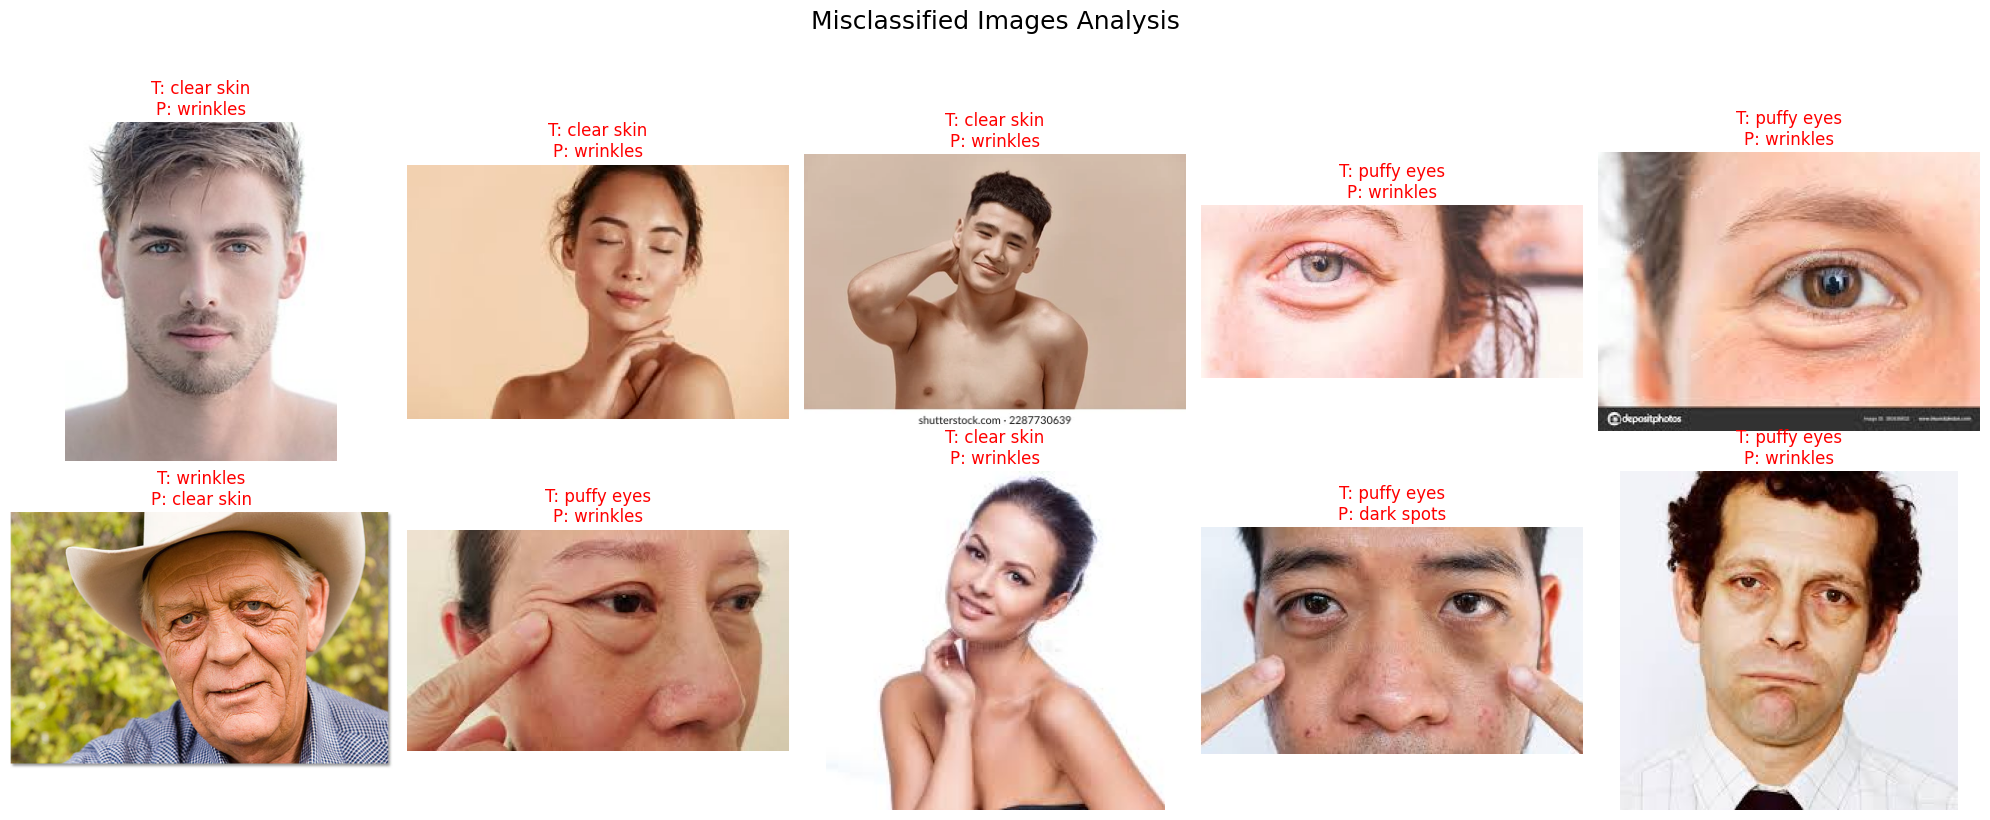


--- Validation Report on Unseen Data ---
Classification Report:
              precision    recall  f1-score   support

    wrinkles       0.64      0.92      0.75        50
  dark spots       0.82      0.94      0.88        50
  puffy eyes       0.89      0.62      0.73        50
  clear skin       0.89      0.63      0.74        49

    accuracy                           0.78       199
   macro avg       0.81      0.78      0.78       199
weighted avg       0.81      0.78      0.78       199



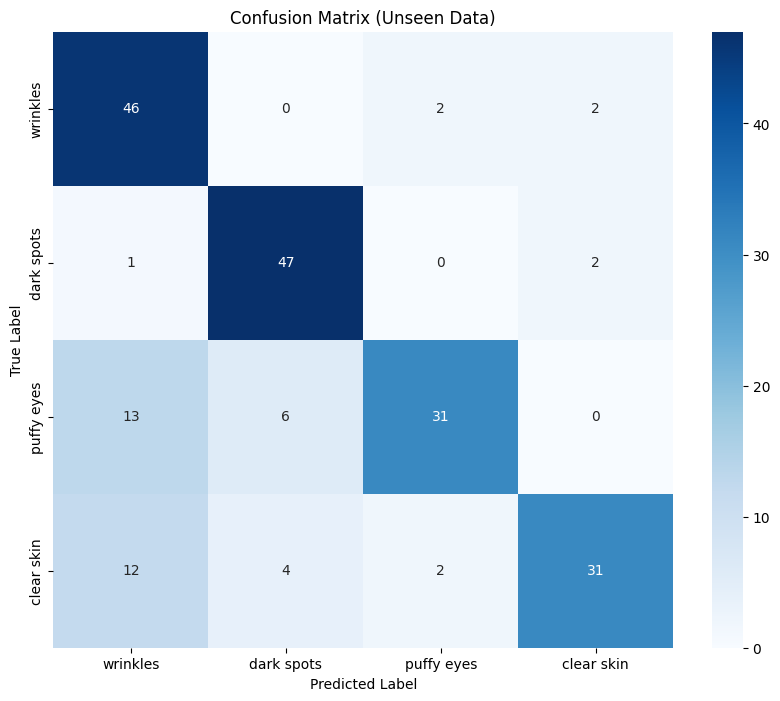

--- Validation Complete ---


In [11]:
import tensorflow as tf
import cv2
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import drive
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# --- Configuration ---
MODEL_PATH = '/content/gdrive/MyDrive/FacialAgingProject/final_efficientnet_model.h5'
VALIDATION_DIR = '/content/gdrive/MyDrive/FacialAgingProject/unseen_test'
# Must match the classes and order used during training
CLASSES = ['wrinkles', 'dark spots', 'puffy eyes', 'clear skin']
IMG_SIZE = 224 # Must match the size used during training
MAX_DISPLAY_ERRORS = 10 # Control how many incorrect images to display

# --- 1. Mount Drive ---
print("Mounting Google Drive...")
if not os.path.exists('/content/gdrive/MyDrive'):
    drive.mount('/content/gdrive')
else:
    print("Drive already mounted.")

# --- 2. Load and Preprocess Validation Data ---
def load_validation_data(data_dir, classes, img_size):
    """Loads images, stores true labels and their file paths for debugging."""
    data = []
    true_labels = []
    filepaths = [] # Store file paths for later display

    print(f"\nStarting image loading from: {data_dir}")
    for idx, label in enumerate(classes):
        path = os.path.join(data_dir, label)
        if not os.path.exists(path):
            print(f"⚠️ Warning: Class folder not found: {path}. Skipping.")
            continue

        print(f"Processing class: {label}")
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path)

            if img is not None:
                # Store the file path before processing
                filepaths.append(img_path)

                # BGR to RGB conversion
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                # Resize
                img = cv2.resize(img, (img_size, img_size))

                # Append as float32 in [0, 255] range
                data.append(img.astype('float32'))
                true_labels.append(idx)

    return np.array(data), np.array(true_labels), filepaths

# Load the unseen dataset
X_unseen, y_true_indices, filepaths = load_validation_data(VALIDATION_DIR, CLASSES, IMG_SIZE)

# Calculate total images
total_images = len(X_unseen)
if total_images == 0:
    raise ValueError("No images loaded. Please check the VALIDATION_DIR path and folder structure.")

print(f"\nUnseen Dataset Loaded. Total images: **{total_images}**")
print(f"Data shape: {X_unseen.shape}")

# --- 3. Load the Saved Model ---
print(f"\nLoading model from: {MODEL_PATH}")
try:
    model = tf.keras.models.load_model(MODEL_PATH, compile=False)
except Exception as e:
    raise Exception(f"Failed to load model. Check path and file: {e}")

# --- 4. Predict and Evaluate ---
print("\nPredicting on unseen data...")

# Get predictions (probabilities)
y_pred_probs = model.predict(X_unseen, verbose=1)

# Convert probabilities to class indices
y_pred_indices = np.argmax(y_pred_probs, axis=1)

# --- 5. Identify and Display Misclassified Images ---

# Find indices where True label != Predicted label
misclassified_indices = np.where(y_true_indices != y_pred_indices)[0]
num_errors = len(misclassified_indices)
num_correct = total_images - num_errors

print("\n--- Summary of Results ---")
print(f"Total Images Processed: **{total_images}**")
print(f"Correctly Predicted:    **{num_correct}**")
print(f"Wrongly Predicted:      **{num_errors}**")
print("-" * 30)

# Select a random subset of errors to display (if there are too many)
display_indices = misclassified_indices
if num_errors > MAX_DISPLAY_ERRORS:
    display_indices = random.sample(list(misclassified_indices), MAX_DISPLAY_ERRORS)
    print(f"Displaying a random sample of {MAX_DISPLAY_ERRORS} out of {num_errors} errors:")

# Determine grid size for display
cols = 5
rows = (len(display_indices) + cols - 1) // cols
plt.figure(figsize=(20, 4 * rows))

# Plot the misclassified images
for i, index in enumerate(display_indices):
    plt.subplot(rows, cols, i + 1)

    # Load the original image file using the stored path
    # Use cv2.imread and convert to RGB for broader format support
    img_bgr = cv2.imread(filepaths[index])
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # Convert BGR to RGB

    true_label = CLASSES[y_true_indices[index]]
    predicted_label = CLASSES[y_pred_indices[index]]

    # Title format: TRUE label -> PREDICTED label
    plt.title(f"T: {true_label}\nP: {predicted_label}",
              color='red', fontsize=12)
    plt.imshow(img_rgb) # Display the RGB image
    plt.axis('off')

plt.suptitle("Misclassified Images Analysis", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

# --- 6. Generate and Display Final Report ---
print("\n--- Validation Report on Unseen Data ---")
print("Classification Report:")
print(classification_report(y_true_indices, y_pred_indices, target_names=CLASSES))

# Compute and Plot Confusion Matrix
cm = confusion_matrix(y_true_indices, y_pred_indices)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=CLASSES, yticklabels=CLASSES)
plt.title('Confusion Matrix (Unseen Data)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("--- Validation Complete ---")